dataset: https://www.kaggle.com/benhamner/nips-papers/home

In [36]:
import pandas as pd

In [37]:
dataset=pd.read_csv(r"D:\nlp_project\nips-papers\papers.csv")
dataset.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [38]:
dataset=dataset.loc[(dataset['abstract']!='Abstract Missing')]
dataset['abs1']=dataset[['title','abstract']].apply(lambda x:''.join(x),axis=1)

In [39]:
dataset.head()

,id,year,title,event_type,pdf_name,abstract,paper_text,abs1
941,1861,2000,Algorithms for Non-negative Matrix Factorization,NaN,1861-algorithms-for-non-negative-matrix-factor...,Non-negative matrix factorization (NMF) has pr...,Algorithms for Non-negative Matrix\nFactorizat...,Algorithms for Non-negative Matrix Factorizati...
1067,1975,2001,Characterizing Neural Gain Control using Spike...,NaN,1975-characterizing-neural-gain-control-using-...,Spike-triggered averaging techniques are effec...,Characterizing neural gain control using\nspik...,Characterizing Neural Gain Control using Spike...
2384,3163,2007,Competition Adds Complexity,NaN,3163-competition-adds-complexity.pdf,It is known that determinining whether a DEC-P...,Competition adds complexity\n\nJudy Goldsmith\...,Competition Adds ComplexityIt is known that de...
2385,3164,2007,Efficient Principled Learning of Thin Junction...,NaN,3164-efficient-principled-learning-of-thin-jun...,We present the first truly polynomial algorith...,Efficient Principled Learning of Thin Junction...,Efficient Principled Learning of Thin Junction...
2388,3167,2007,Regularized Boost for Semi-Supervised Learning,NaN,3167-regularized-boost-for-semi-supervised-lea...,Semi-supervised inductive learning concerns ho...,Regularized Boost for Semi-Supervised Learning...,Regularized Boost for Semi-Supervised Learning...


In [40]:
dataset.shape

(3924, 8)

In [41]:
data=dataset.loc[:,['id','year','abs1']]

In [42]:
data.head()

,id,year,abs1
941,1861,2000,Algorithms for Non-negative Matrix Factorizati...
1067,1975,2001,Characterizing Neural Gain Control using Spike...
2384,3163,2007,Competition Adds ComplexityIt is known that de...
2385,3164,2007,Efficient Principled Learning of Thin Junction...
2388,3167,2007,Regularized Boost for Semi-Supervised Learning...


In [43]:
#text exploration
data['word_count']=data['abs1'].apply(lambda x:len(str(x).split(" ")))

In [44]:
data.head()

,id,year,abs1,word_count
941,1861,2000,Algorithms for Non-negative Matrix Factorizati...,111
1067,1975,2001,Characterizing Neural Gain Control using Spike...,87
2384,3163,2007,Competition Adds ComplexityIt is known that de...,69
2385,3164,2007,Efficient Principled Learning of Thin Junction...,149
2388,3167,2007,Regularized Boost for Semi-Supervised Learning...,123


In [45]:
data.word_count.describe()

count    3924.000000
mean      154.888124
std        46.001025
min        26.000000
25%       121.000000
50%       150.000000
75%       184.000000
max       324.000000
Name: word_count, dtype: float64

In [46]:
#commom words
freq=pd.Series(''.join(data['abs1']).split()).value_counts()[:20]

In [47]:
freq

the         30107
of          21685
a           16518
and         14218
to          13104
in           9454
for          8382
that         7841
is           7687
on           5704
we           5167
with         5142
We           5003
as           3686
this         3677
are          3546
an           3398
by           3302
can          2958
learning     2890
dtype: int64

In [48]:
#uncommom words
freq1=pd.Series(' '.join(data['abs1']).split()).value_counts()[-20:]

In [49]:
freq1

LS,                   1
CEPM                  1
train/test            1
problems---in         1
dominate,             1
unbiased---these      1
celebrity             1
one-at-a-time.        1
largest-scale         1
engineered            1
Summarizing           1
solvesthe             1
plug-and-play         1
choices?              1
grasping,             1
near-duplicates       1
prize.                1
sub-gamma             1
combat                1
semidefinitematrix    1
dtype: int64

In [50]:
#text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [51]:
stop_words=set(stopwords.words("english"))
new_words=["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words=stop_words.union(new_words)

In [52]:
len(stop_words)

190

In [54]:
corpus=[]
for i in range(0,len(data)):
    text=re.sub('[^a-zA-Z]',' ',data['abs1'].iloc[i])
    text=text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text=text.split()
    ps=PorterStemmer()
    lem=WordNetLemmatizer()
    text=[lem.lemmatize(word) for word in text if word not in stop_words]
    text=" ".join(text)
    corpus.append(text)

In [55]:
len(corpus)

3924

In [58]:
corpus[222]

'temporal difference based actor critic learning convergence neural implementationactor critic algorithm reinforcement learning achieving renewed popularity due good convergence property situation approach often fail e g function approximation involved interestingly growing evidence actor critic approach based phasic dopamine signal play key role biological learning cortical basal ganglion derive temporal difference based actor critic learning algorithm convergence proved without assuming separate time scale actor critic approach demonstrated applying network spiking neuron established relation phasic dopamine temporal difference signal lends support biological relevance algorithm'

In [60]:
#Data visualization
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt


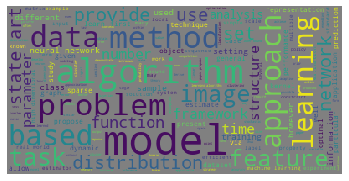

In [62]:
wordcloud=WordCloud(
background_color='grey',
stopwords=stop_words,
max_words=200,
max_font_size=50,
random_state=40).generate(str(corpus))
print(wordcloud)
fig=plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig('wordcloud.png',dpi=900)

In [64]:
#text prepare
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_df=0.8,stop_words=stop_words,max_features=10000,ngram_range=(1,3))
x=cv.fit_transform(corpus)

In [65]:
x

<3924x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 327469 stored elements in Compressed Sparse Row format>

In [66]:
list(cv.vocabulary_.keys())[:20]

['algorithm',
 'non',
 'negative',
 'matrix',
 'factorization',
 'nmf',
 'useful',
 'decomposition',
 'multivariate',
 'data',
 'different',
 'multi',
 'analyzed',
 'differ',
 'slightly',
 'multiplicative',
 'factor',
 'used',
 'update',
 'rule']

In [68]:
x.shape

(3924, 10000)

[Text(0, 0, 'model'),
 Text(0, 0, 'algorithm'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'method'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'data'),
 Text(0, 0, 'approach'),
 Text(0, 0, 'function'),
 Text(0, 0, 'network'),
 Text(0, 0, 'based'),
 Text(0, 0, 'time'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'task'),
 Text(0, 0, 'result'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'propose'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'state'),
 Text(0, 0, 'image'),
 Text(0, 0, 'bound'),
 Text(0, 0, 'neural'),
 Text(0, 0, 'inference'),
 Text(0, 0, 'performance'),
 Text(0, 0, 'set'),
 Text(0, 0, 'linear'),
 Text(0, 0, 'number'),
 Text(0, 0, 'matrix'),
 Text(0, 0, 'optimization'),
 Text(0, 0, 'analysis'),
 Text(0, 0, 'framework')]

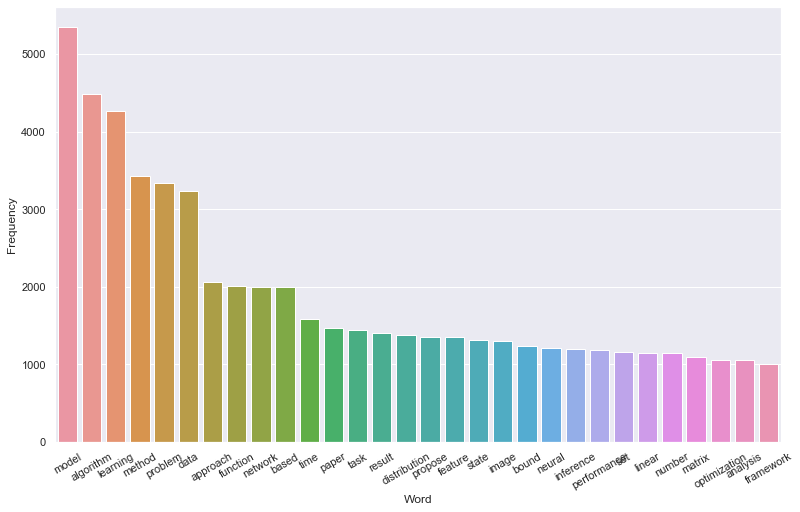

In [82]:
#visualize top n unigram,bigram,trigram
def gettopnwords(corpus,n=None):
    vec=CountVectorizer().fit(corpus)
    #print(vec)
    bag_of_words=vec.transform(corpus)
    #print(bag_of_words)
    sum_words=bag_of_words.sum(axis=0)
    #print(sum_words)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
    return word_freq[:n]


top_words=gettopnwords(corpus,n=30)
top_df=pd.DataFrame(top_words)
top_df.columns=["Word","Frequency"]


import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g=sns.barplot(x="Word",y="Frequency",data=top_df)
g.set_xticklabels(g.get_xticklabels(),rotation=30)





[Text(0, 0, 'state art'),
 Text(0, 0, 'neural network'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'high dimensional'),
 Text(0, 0, 'learning algorithm'),
 Text(0, 0, 'lower bound'),
 Text(0, 0, 'graphical model'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'paper propose'),
 Text(0, 0, 'reinforcement learning'),
 Text(0, 0, 'gaussian process'),
 Text(0, 0, 'low rank'),
 Text(0, 0, 'optimization problem'),
 Text(0, 0, 'experimental result'),
 Text(0, 0, 'loss function'),
 Text(0, 0, 'gradient descent'),
 Text(0, 0, 'monte carlo'),
 Text(0, 0, 'stochastic gradient'),
 Text(0, 0, 'convergence rate')]

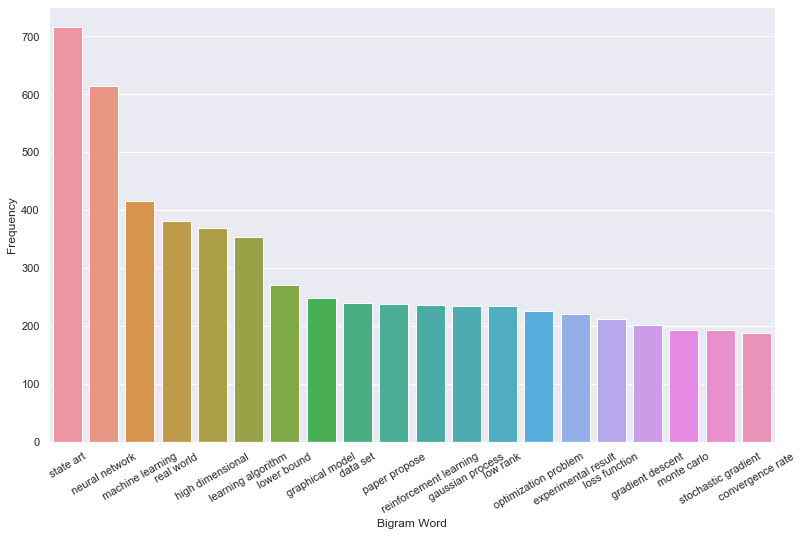

In [89]:
def gettopn2words(corpus,n=None):
    vec1=CountVectorizer(ngram_range=(2,2),max_features=2500).fit(corpus)
    #print(vec)
    bag_of_words=vec1.transform(corpus)
    #print(bag_of_words)
    sum_words=bag_of_words.sum(axis=0)
    #print(sum_words)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
    return word_freq[:n]


top2_words=gettopn2words(corpus,n=20)
top2_df=pd.DataFrame(top2_words)
top2_df.columns=["Bigram Word","Frequency"]


import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bigram Word",y="Frequency",data=top2_df)
h.set_xticklabels(h.get_xticklabels(),rotation=30)


[Text(0, 0, 'convolutional neural network'),
 Text(0, 0, 'deep neural network'),
 Text(0, 0, 'stochastic gradient descent'),
 Text(0, 0, 'state art performance'),
 Text(0, 0, 'real world datasets'),
 Text(0, 0, 'recurrent neural network'),
 Text(0, 0, 'state art method'),
 Text(0, 0, 'semi supervised learning'),
 Text(0, 0, 'low rank matrix'),
 Text(0, 0, 'multi armed bandit'),
 Text(0, 0, 'real world data'),
 Text(0, 0, 'markov decision process'),
 Text(0, 0, 'synthetic real world'),
 Text(0, 0, 'latent variable model'),
 Text(0, 0, 'outperforms state art'),
 Text(0, 0, 'state art result'),
 Text(0, 0, 'chain monte carlo'),
 Text(0, 0, 'markov chain monte'),
 Text(0, 0, 'empirical risk minimization'),
 Text(0, 0, 'principal component analysis')]

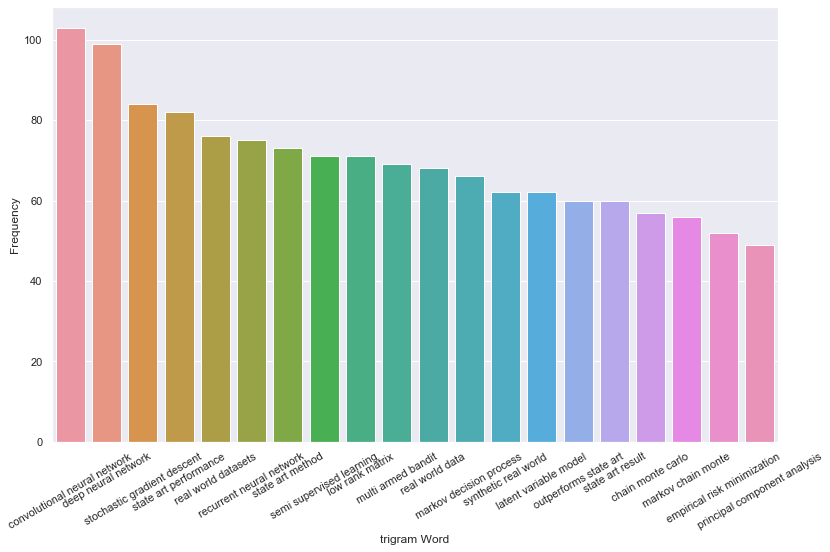

In [91]:
def gettopn3words(corpus,n=None):
    vec=CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
    #print(vec)
    bag_of_words=vec.transform(corpus)
    #print(bag_of_words)
    sum_words=bag_of_words.sum(axis=0)
    #print(sum_words)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
    return word_freq[:n]


top_words=gettopn3words(corpus,n=20)
top_df=pd.DataFrame(top_words)
top_df.columns=["trigram Word","Frequency"]


import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g=sns.barplot(x="trigram Word",y="Frequency",data=top_df)
g.set_xticklabels(g.get_xticklabels(),rotation=30)


In [102]:
#convert to matrix of integers
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf.fit(x)

#get feature names
feature_names=cv.get_feature_names()
#print(feature_names)
doc=corpus[0]
tfidfvector=tfidf.transform(cv.transform([doc]))
print(tfidfvector)











['ability', 'ability model', 'able', 'able achieve', 'able capture', 'able handle', 'able learn', 'able predict', 'able significantly', 'absence', 'absolute', 'absorbing', 'abstain', 'abstention', 'abstract', 'abstract game', 'abstraction', 'ac', 'accelerate', 'accelerated', 'accelerated gradient', 'accelerated gradient method', 'accelerated method', 'accelerated proximal', 'accelerated proximal gradient', 'accelerated stochastic', 'accelerating', 'acceleration', 'access', 'accommodate', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounting', 'accuracy', 'accuracy efficiency', 'accurate', 'accurate estimate', 'accurate model', 'accurate prediction', 'accurate solution', 'accurately', 'accurately predict', 'achievable', 'achieve', 'achieve accuracy', 'achieve best', 'achieve better', 'achieve comparable', 'achieve competitive', 'achieve goal', 'achieve high', 'achieve higher', 'achieve optimal', 'achieve state', 'achieve state art', 'achieved', 'achieved state

In [101]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    print("Sorted",sorted_items)
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results#sort the tf-idf vectors by descending order of scoressorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
algorithm non negative matrix factorizationnon negative matrix factorization nmf useful decomposition multivariate data different multi plicative algorithm nmf analyzed differ slightly multiplicative factor used update rule algorithm minimize conventional least square error minimizes generalized kullback leibler divergence monotonic convergence algorithm proven auxiliary func tion analogous used proving convergence expectation maximization algorithm algorithm interpreted diag onally rescaled gradient descent rescaling factor optimally chosen ensure convergence

Keywords:
critic 0.458
actor critic 0.381
actor 0.366
temporal difference 0.289
difference 0.198
